<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/HeaDS_logo_large_withTitle.png?raw=1" width="300">

<img src="https://github.com/Center-for-Health-Data-Science/PythonTsunami/blob/spring2022/figures/tsunami_logo.PNG?raw=1" width="600">


# Exploratory Data Analysis

In this section we will investigate our data with pandas and make some plots with seaborn to get an impression of the data.

First lets import some libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## A first look at the data

We will use the csv reader from pandas to read in our example data set from before, then display the first 5 lines.

In [ ]:
#using pandas csv reader to load data from our github repo
link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/diabetes.csv"

db_df = pd.read_csv(link_to_file)
db_df.head()

,ID,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,9046,34,Male,84,0.619,24.7,93,Yes,Self-employed,Unknown,0
1,51676,25,Male,74,0.591,22.5,102,No,Public,Unknown,0
2,31112,30,Male,0,0.839,32.3,75,Yes,Private,Former,1
3,60182,50,Male,80,0.178,34.5,98,Yes,Self-employed,Unknown,1
4,1665,27,Female,60,0.206,26.3,82,Yes,Private,Never,0


Using the `info` method on our dataframe object gives us a quick insight into the features we have available and their type:

In [ ]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                532 non-null    int64  
 1   Age               532 non-null    int64  
 2   Sex               532 non-null    object 
 3   BloodPressure     532 non-null    int64  
 4   GeneticRisk       527 non-null    float64
 5   BMI               532 non-null    float64
 6   PhysicalActivity  532 non-null    int64  
 7   Married           532 non-null    object 
 8   Work              532 non-null    object 
 9   Smoker            532 non-null    object 
 10  Diabetes          532 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 45.8+ KB


How many features does our data set have?

How many of them are numeric?

Is there a feature we can use as an 'outcome' or metadata?


We can see some problems at this point.

* The Diabetes column is taken as numerical but it is actually the outcome variable in 0/1 encoding.
* The ID column is also mistaken as numerical. We probably want to get rid of it before we proceed.

In [ ]:
#How can we remove the ID column?


We'll also change the data type of the Diabetes column to categorical.

In [ ]:
db_df['Diabetes'] = db_df['Diabetes'].astype('category')

Does it look right now?

In [ ]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                532 non-null    int64  
 1   Age               532 non-null    int64  
 2   Sex               532 non-null    object 
 3   BloodPressure     532 non-null    int64  
 4   GeneticRisk       527 non-null    float64
 5   BMI               532 non-null    float64
 6   PhysicalActivity  532 non-null    int64  
 7   Married           532 non-null    object 
 8   Work              532 non-null    object 
 9   Smoker            532 non-null    object 
 10  Diabetes          532 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 45.8+ KB


Do you notice anything else about the output of `info`?

It appears we have some missing values in the `GeneticRisk` column. It is the only one with a different `Non-Null Count`. We can confirm this by directly investigating whether any of the fields in our dataframe are `NA`, i.e. missing:

In [ ]:
db_df.isna()

,ID,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
527,False,False,False,False,False,False,False,False,False,False,False
528,False,False,False,False,True,False,False,False,False,False,False
529,False,False,False,False,False,False,False,False,False,False,False
530,False,False,False,False,False,False,False,False,False,False,False


Can you see it? Look at row number 528.

We of course do not want to scroll through the entire dataframe, so we will summarize how many fields were true per column by running `sum()` on the output:

In [ ]:
db_df.isna().sum()

ID                  0
Age                 0
Sex                 0
BloodPressure       0
GeneticRisk         5
BMI                 0
PhysicalActivity    0
Married             0
Work                0
Smoker              0
Diabetes            0
dtype: int64

There are indeed 5 missing values in the GeneticRisk column. We can investigate them by using `isna()` in a conditional selection, like we did in the previous notebook:

In [ ]:
missing = db_df.loc[db_df['GeneticRisk'].isna()]
missing

,ID,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
91,66315,24,Male,54,NaN,26.7,62,Yes,Private,Smoker,0
337,18051,42,Male,78,NaN,26.8,79,Yes,Private,Former,0
457,31164,52,Female,70,NaN,19.9,75,No,Self-employed,Former,0
518,22622,61,Female,60,NaN,26.2,97,Yes,Self-employed,Unknown,0
528,61843,31,Female,66,NaN,39.1,85,No,Private,Smoker,1


We'll remove missing values when get to cleaning the data.

First, let's continue our investigation. We use the `describe` method to get summary stats for each of the numeric columns.

In [ ]:
db_df.describe()

,ID,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity
count,532.000000,532.000000,532.000000,527.000000,532.000000,532.000000
mean,36419.845865,33.686090,67.986842,0.479664,29.649248,85.150376
std,21665.036352,11.425067,21.930506,0.321605,7.955560,24.970490
min,129.000000,21.000000,0.000000,0.078000,0.000000,19.000000
25%,17186.250000,24.000000,62.000000,0.251500,24.600000,67.000000
50%,35655.000000,30.000000,72.000000,0.402000,30.400000,81.000000
75%,55433.250000,41.000000,80.000000,0.633500,34.600000,101.250000
max,72918.000000,81.000000,114.000000,2.420000,57.100000,177.000000


You might be able to see another problem here already, but we'll defer exploration of it until we've talked about plotting.

## Plotting with seaborn

`seaborn` is a library build on top of `matplotlib` that gives you quick and easy access to commonly desired plots.

Generally, to make a plot we need the following kind of information:
* The kind of plot
* The data to use
* What's on the x axis
* What's on the y axis
* Other parameters depending on plot type.


Regarding the type of plot, here is a handy overview from the [Seaborn functions overview](https://seaborn.pydata.org/tutorial/function_overview.html) that lists the kinds of plots you can make.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="600">

Seaborn works with pandas dataframes as as the format of input data. The general structure of a seaborn command looks like this (provided you have imported seaborn as `sns`):

<img src="https://github.com/Center-for-Health-Data-Science/Python_part2/blob/main/teachers/figures/sns_plot_command.PNG?raw=1" width="600">



## Boxplots

Let's start out making boxplots to have a graphical representation of the summary stats.

We can apply the general formula for seaborn and fill in our desired plot type, the dataframe and the x axis.


<Axes: xlabel='Age'>

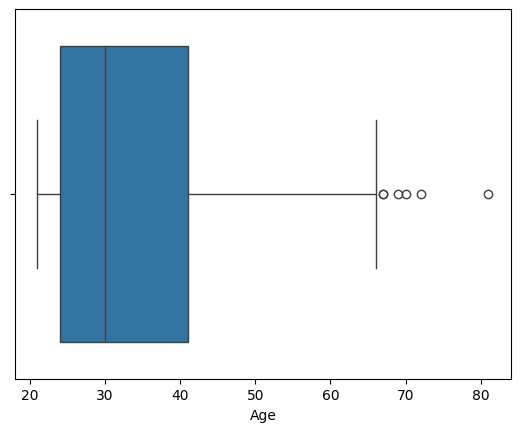

In [ ]:
sns.boxplot(data=db_df,x='Age')

With a very similar syntax we can instead make a scatter plot:

<Axes: xlabel='Age', ylabel='GeneticRisk'>

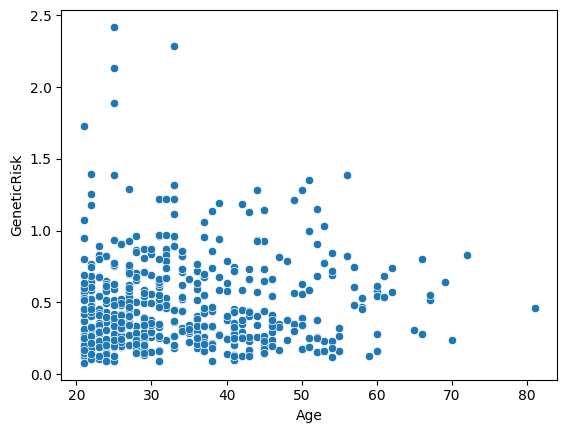

In [ ]:
sns.scatterplot(data=db_df,x='Age',y='GeneticRisk')

Or a barplot that shows us how many times we see each value in the 'Work' feature.

This type of plot was not included yet in the overview figure above, but you can find it by googling what you want to do. I.e. 'seaborn barplot count values'.

<Axes: xlabel='Work', ylabel='count'>

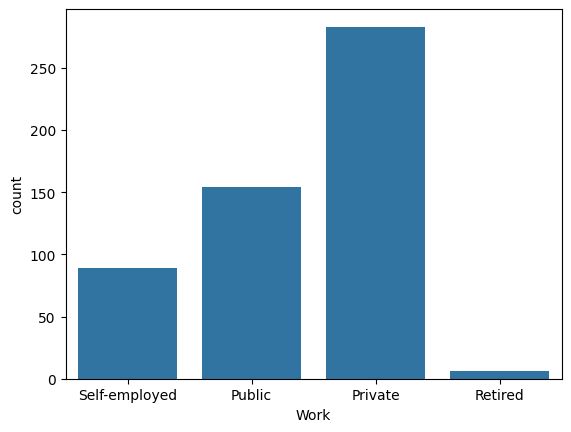

In [ ]:
sns.countplot(data=db_df,x='Work')

One of the additional arguments that is super useful is `hue`. It tells seaborn to color the plot after one of the columns in the dataframe, which effectly split the plot up into two of more categories!

<Axes: xlabel='Age'>

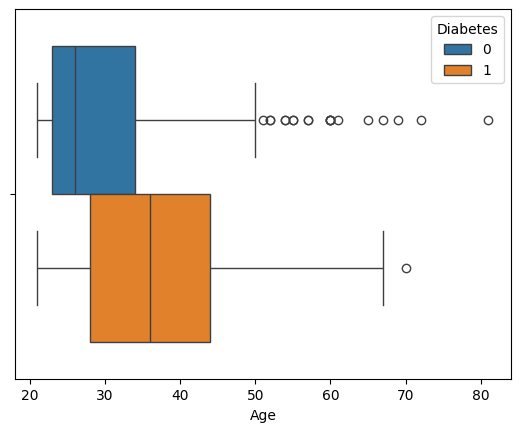

In [ ]:
sns.boxplot(data=db_df,x='Age',hue='Diabetes')

<Axes: xlabel='Work', ylabel='count'>

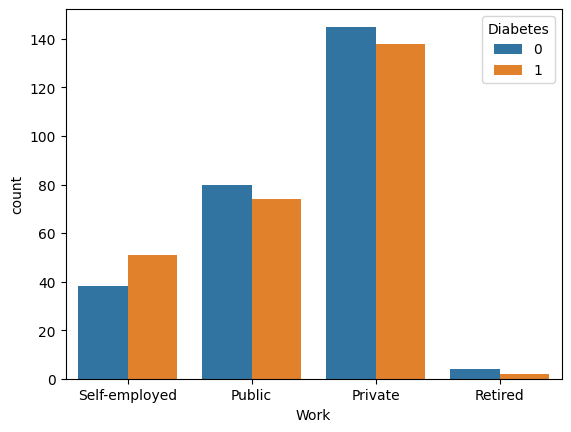

In [ ]:
sns.countplot(data=db_df,x='Work', hue='Diabetes')

<Axes: xlabel='Age', ylabel='GeneticRisk'>

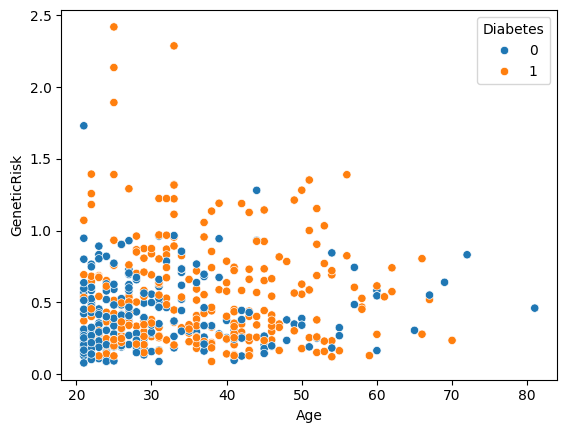

In [ ]:
sns.scatterplot(data=db_df,x='Age',y='GeneticRisk',hue='Diabetes')

## Exercise 1 (10 mins)

Make the following plots:

1. A boxplot of the genetic risk score.
2. A boxplots of the age, split up by the type of work.
3. A barplot of how many times we see each of the values in Smoker. I.e. how many people are smokers, non-smokers, former smokers.



## Exercise 2 (10 mins)

Interpreting boxplots.
Now, make a boxplot for each of the numeric columns in the dataframe.

Compare what you see in the plots to the values in `.describe()` (perhaps just rerun it down here so you don't have to scroll too much). Can you identify the mean, max, min and quartiles?

## Data Cleaning

Did you observe something strange in the plots from Exercise 1?



The histogram of the BMI feature shows some values at 0. The same is the case for the blood pressure column.  

We don't know what caused this, whether these are typos or perhaps they were initially missing values that got recoded as 0s.

Whichever is the reason, it makes no sense for someone to have a BMI or a blood pressure of 0 and so we'll need to remove these lines of data before moving forward. We will also remove lines with missing values.

## Exercise 3 (15 mins)

In your group, create a cleaned version of the dataframe called `data_clean`. For this you need to remove:

* rows in which BMI is 0
* rows in which blood pressure is 0
* rows in which the genetic risk score is missing (NA)

Use conditional selection. Have a look at the previous notebook if need you a refresher. You can do this is in one step or several steps.

When you are done:

* confirm that the 0 values have been removed by remaking the boxplots
* confirm that the missing values have been removed
* verify how many rows you have left in your cleaned dataset

The answer should be 488.

Then remove the ID column. Have a look at [Omitting Columns](https://colab.research.google.com/drive/1hfp2LU-TngXBsZYPUpzH0xei-XQ16o9J#scrollTo=yYHPWP7qw6Uu) if you don't remember how to drop columns.

When you are satisfied that this is the correct data, reset the index on the cleaned dataframe.

## Saving data

Let's save the cleaned dataset so we don't have to do it again:

In [ ]:
data_clean.to_csv('diabetes_clean.csv', index=False)

Download the file and save it where you can find it again. You may need to reload your 'Files' tab if it doesn't show up.

## Distribution plots

Alright, now lets take a step further into distribution plots.

As the name implies these types of plots let us see how our data is distributed. Whereas the boxplot is a visual representation of the summary statistics, distribution plots lets us see our data in more detail:

* Does this look like a normal distribution? Mean and standard deviation are not super meaningful if we're look at a non-normal distribution.
* Or any other type you know of?
* Do we have a skewed distribution?
* Are the mean and median close?
* Is there a peak or several peaks? Where are they?



The most popular type of a distibution plot is the histogram. Here we create bins of value ranges and count how many times a value within this range has been seen.

<Axes: xlabel='BMI', ylabel='Count'>

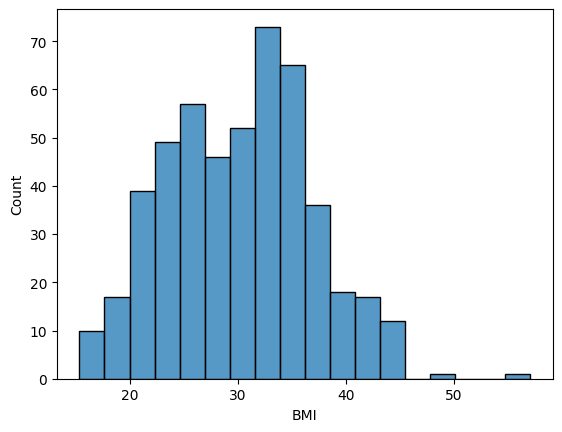

In [ ]:
sns.histplot(data=data_clean, x='BMI')

Just like other plot types, histograms can be split up by another column with the `hue` argument:

<Axes: xlabel='BMI', ylabel='Count'>

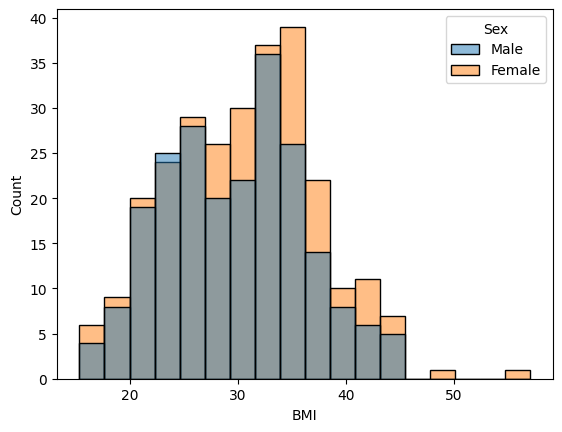

In [ ]:
sns.histplot(data=data_clean, x='BMI', hue='Sex')

Now we have two histograms on top of each other. For this data, maybe it would make more sense to have them next to each other since the distributions for male and female overlap a lot. We can control this with the `multiple` argument.

<Axes: xlabel='BMI', ylabel='Count'>

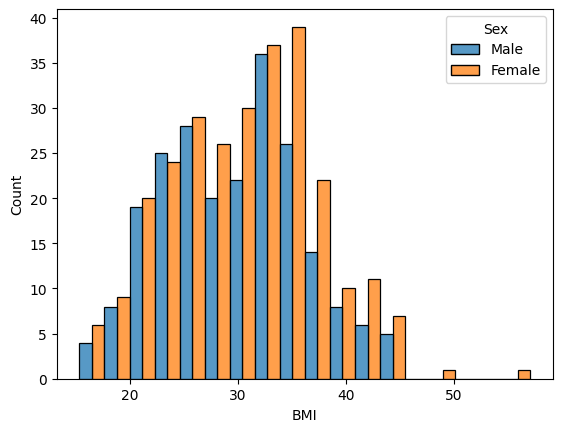

In [ ]:
sns.histplot(data=data_clean, x='BMI', hue='Sex', multiple='dodge')

Another representation that can be handy is to rescale the y-axis to 1 and then show which proportion of values in each bin belongs to each of the groups.  

<Axes: xlabel='BMI', ylabel='Count'>

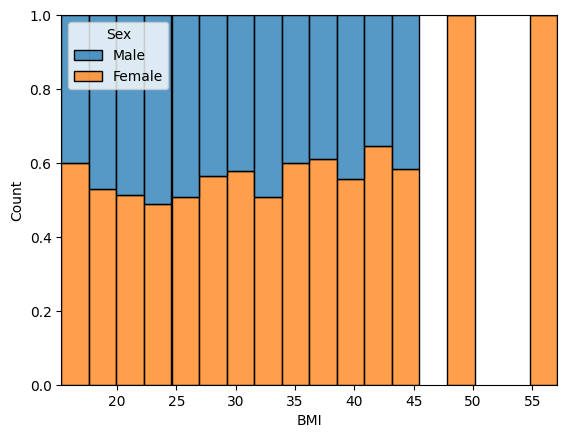

In [ ]:
sns.histplot(data=data_clean, x='BMI', hue='Sex', multiple='fill')

Now, if you image that we make the bins smaller and smaller until they are point-like we would obtain a curve instead of a histrogram. This is called a density plot or a KDE (kernel density estimator).

<Axes: xlabel='BMI', ylabel='Density'>

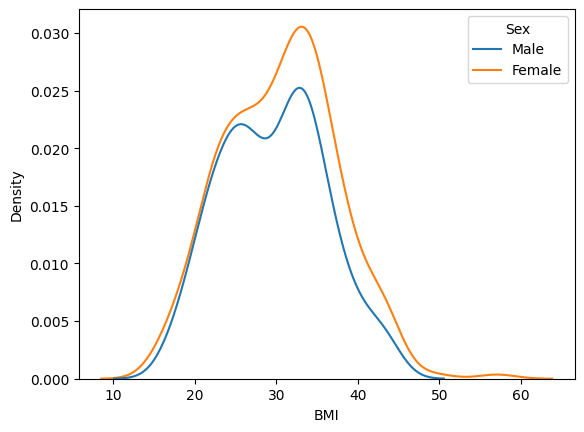

In [ ]:
sns.kdeplot(data=data_clean, x='BMI', hue='Sex')

You can also display a kde on top of the histogram (the figure gets a bit busy though).

<Axes: xlabel='BMI', ylabel='Count'>

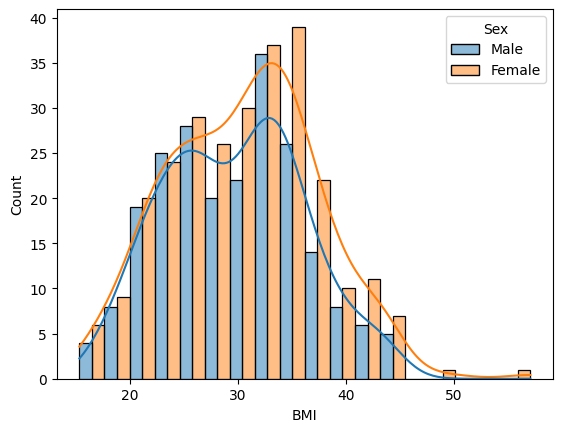

In [ ]:
sns.histplot(data=data_clean, x='BMI', hue='Sex', multiple='dodge', kde = True)

Lastly, you can also visualize distribution on top of a boxplot with a violin plot.

<Axes: xlabel='Age'>

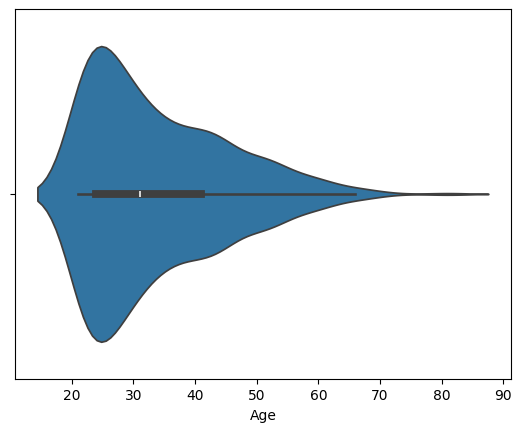

In [ ]:
sns.violinplot(data_clean, x='Age')

## Exercise 4 (10 mins)

Make a histogram of the physical activity and split it up by different categorial variables. Discuss what you see. Then, make a violin plot with the same data. Which visualization do you prefer?

## Heatmaps

Lastly we're gonna look at how to make heatmaps. They are tiled plots with an x-axis and y-axis in which each square is colored according to some value.

Heatmaps are for example used to visualize correlations between variables but they also have many other uses.

First, we need values that we want to visualize. We will calculate a correlation matrix between all numerical features in our data:

In [ ]:
data_clean.corr(numeric_only=True)

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity
Age,1.000000,0.384152,0.036920,0.184691,-0.199597
BloodPressure,0.384152,1.000000,0.047143,0.193337,-0.054355
GeneticRisk,0.036920,0.047143,1.000000,0.232283,-0.114201
BMI,0.184691,0.193337,0.232283,1.000000,-0.467350
PhysicalActivity,-0.199597,-0.054355,-0.114201,-0.467350,1.000000


We see that our matrix does not contain the Diabetes column. This is because we are using `numeric_only=True` and we have made Diabetes a category. If you have reloaded the cleaned data you probably don't have this problem (0/1 will be read in as numbers).

We can cast it back into a number to solve this:

In [ ]:
data_clean['Diabetes'] = data_clean['Diabetes'].astype('int')

In [ ]:
corrs = data_clean.corr(numeric_only=True)
corrs

,Age,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Diabetes
Age,1.000000,0.384152,0.036920,0.184691,-0.199597,0.315566
BloodPressure,0.384152,1.000000,0.047143,0.193337,-0.054355,0.197549
GeneticRisk,0.036920,0.047143,1.000000,0.232283,-0.114201,0.244476
BMI,0.184691,0.193337,0.232283,1.000000,-0.467350,0.787861
PhysicalActivity,-0.199597,-0.054355,-0.114201,-0.467350,1.000000,-0.584989
Diabetes,0.315566,0.197549,0.244476,0.787861,-0.584989,1.000000


Tada, now we have the square matrix of values we wanted. The intersection of x and y axis specifies the correlation between that pair of variables, i.e. 0.18 between BMI and age.

We'll plug this matrix into a heatmap command:

<Axes: >

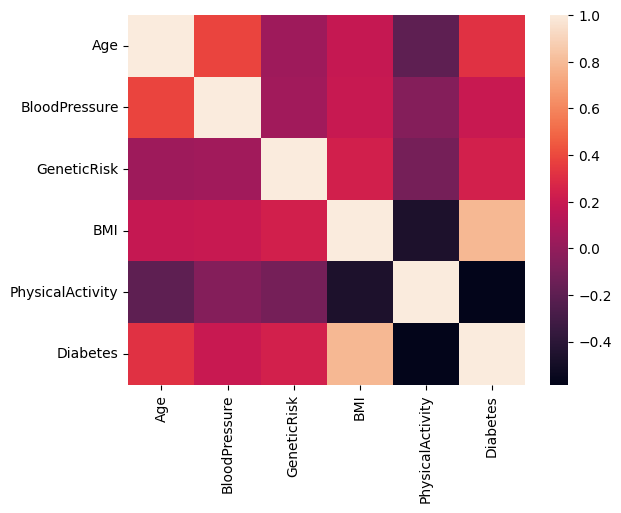

In [ ]:
sns.heatmap(corrs)

Let's do some adjustments: Usually the color scale for heatmaps goes from blue (low correlation) to red (high correlation). You can find all the existing colormaps (`cmap`) in the [colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

<Axes: >

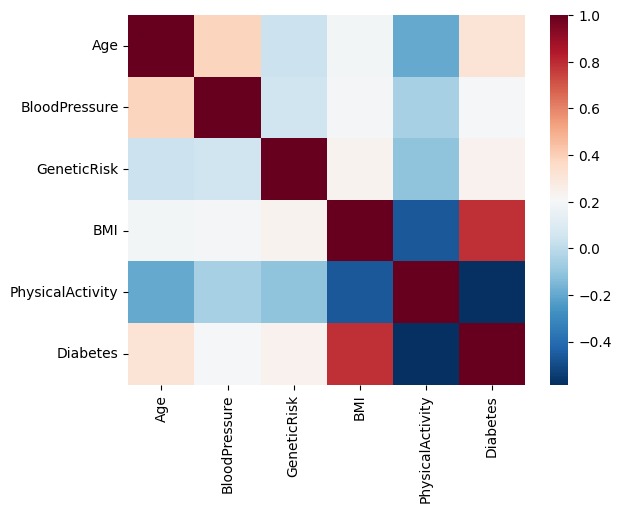

In [ ]:
sns.heatmap(corrs,
            cmap = "RdBu_r")

We'll also center the colormap on 0 and define the extremes of the map as -1 and 1 so intensities are comparable:

<Axes: >

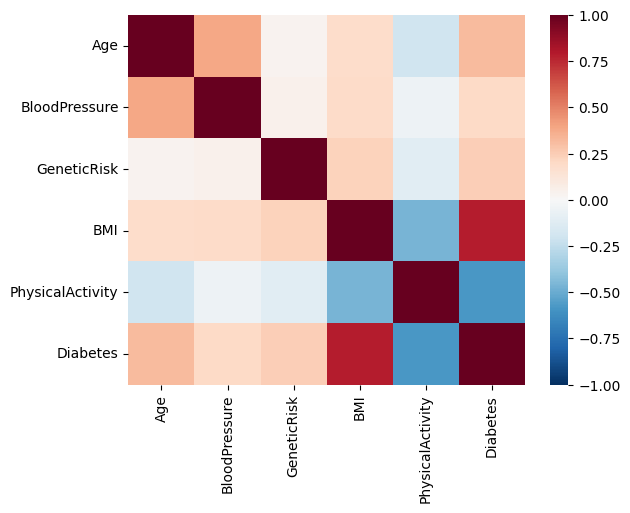

In [ ]:
sns.heatmap(corrs,
            cmap = "RdBu_r",
            center = 0, vmin = -1, vmax = 1)

Lastly, we add annotation(printing the actual value) and format it to two digits after the comma:

<Axes: >

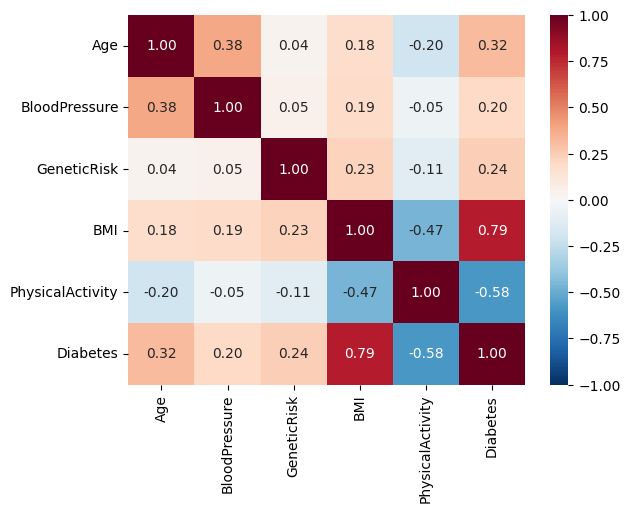

In [ ]:
sns.heatmap(corrs,
            cmap = "RdBu_r",
            center = 0, vmin = -1, vmax = 1,
            annot=True, fmt=".2f")

Does it match what you have discovered about the data so far?

## Interfacing seaborn and matplotlib

Up til now we have made plots with seaborn and directly displayed them. However, plots are also objects that we can interact with in other ways after we have created them! Examples of this are defining the figure size, initializing new figures, changing axes, titles, themes and many other things.

We will now look at how to interface matplotlib with seaborn, for example by running maplotlib commands on seaborn objects.


### Initializing new figures and figure size

Every time we make a plot with seaborn it will appear below the code box, in a certain size. This is because seaborn makes implicit calls to matplotlib to create the canvas on which it will display the plot.

<Axes: xlabel='Age'>

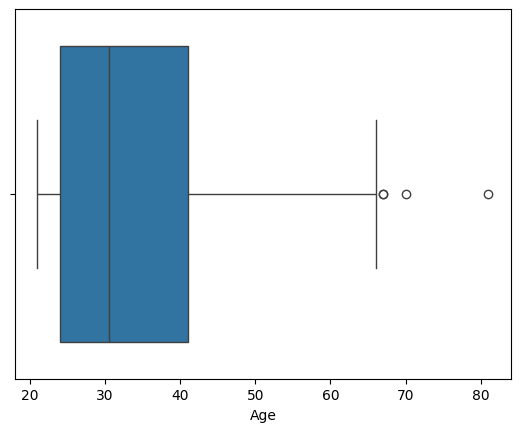

In [ ]:
#standard call to seaborn
sns.boxplot(data=data_clean,x='Age')

We can make these calls explicit in order to have more control over the figure we receive.

The canvas we plot on is called `figure` in matplotlib, so we make a call to `plt.figure` to intialize it. We can then specify the size:

<Axes: xlabel='Age'>

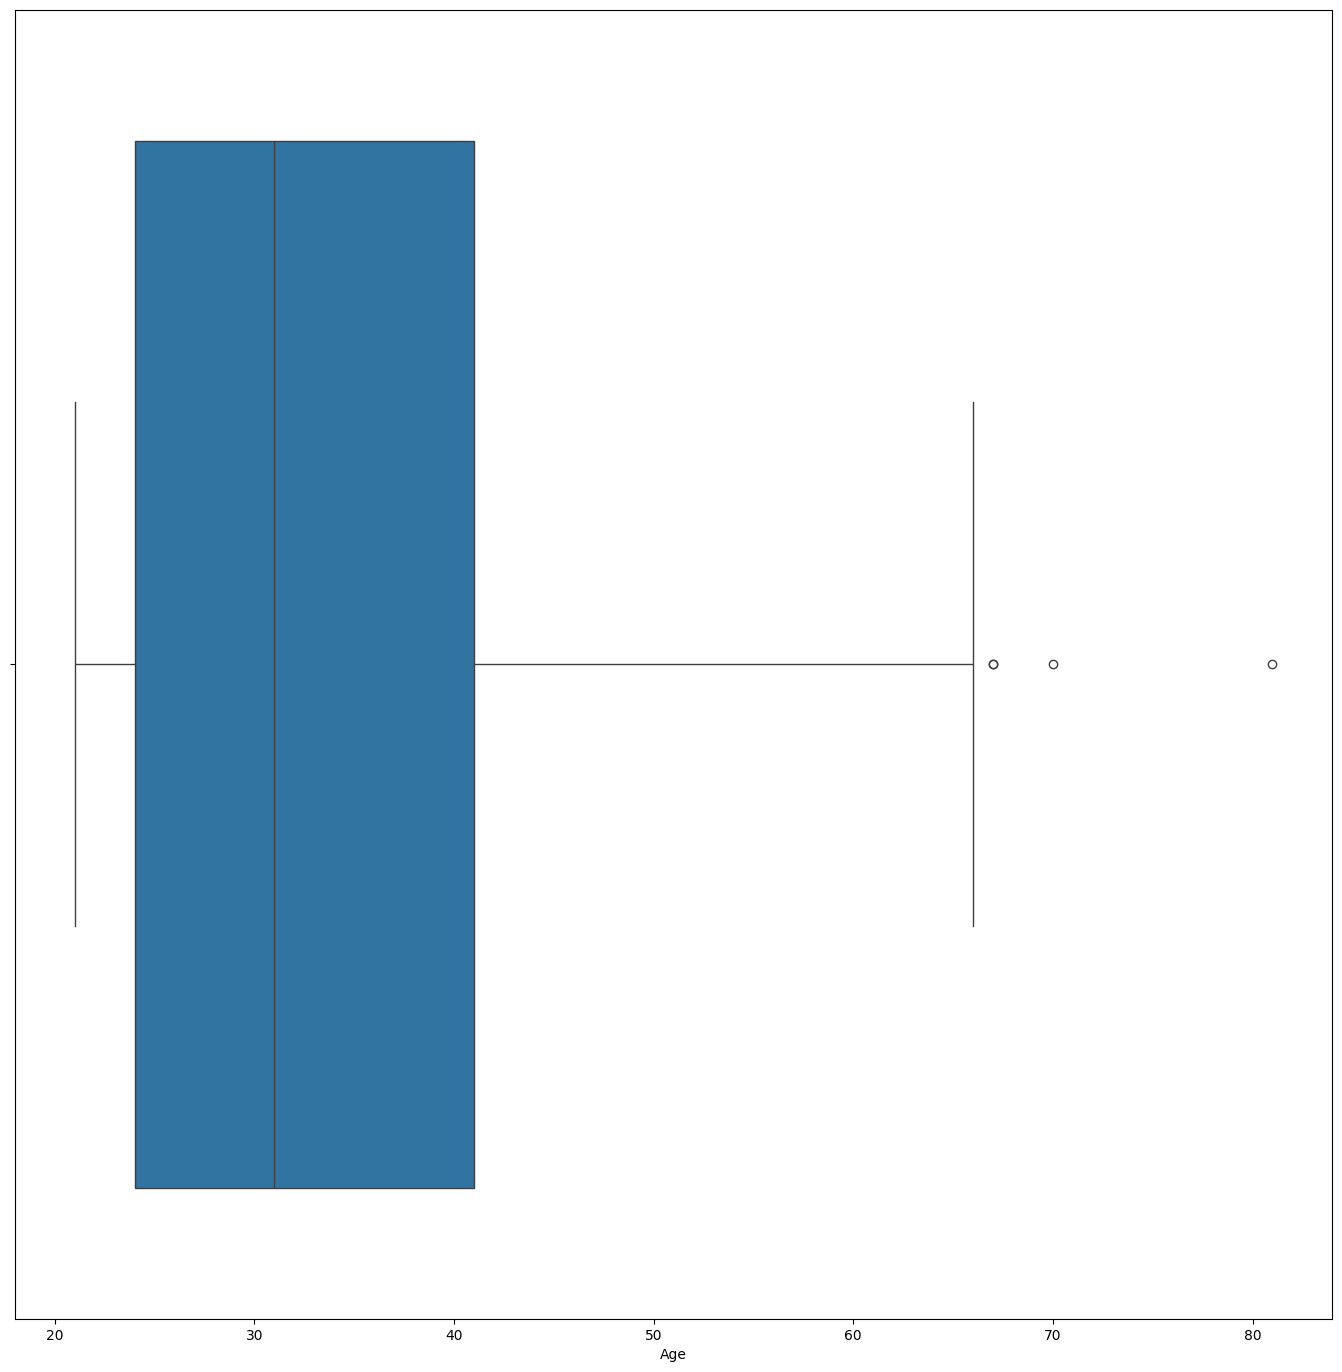

In [ ]:
plt.figure(figsize=(17,17))
sns.boxplot(data=data_clean,x='Age')

<Axes: xlabel='Age'>

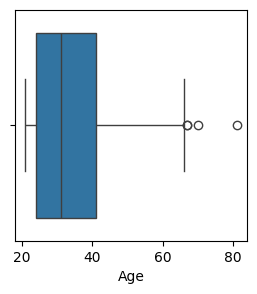

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data_clean,x='Age')

This also lets us do a neat trick.

Lets go back to when we made a boxplot of each of the numeric columns in our dataframe. In order to not have write the code again for each column, we could loop over them like so:

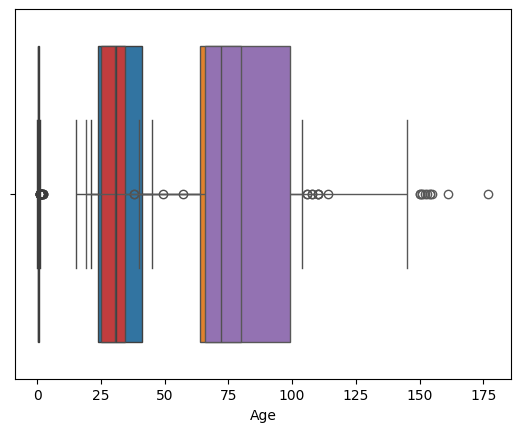

In [ ]:
for col in ['Age', 'BloodPressure', 'GeneticRisk', 'BMI', 'PhysicalActivity']:
        sns.boxplot(data=data_clean,x=col)

This looks not so great because they're all on top of each other. Or in other words, all the plots are painted onto the same canvas. If only we could control this. Oh wait, we can!  


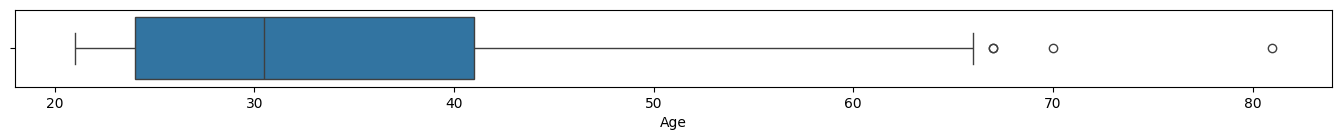

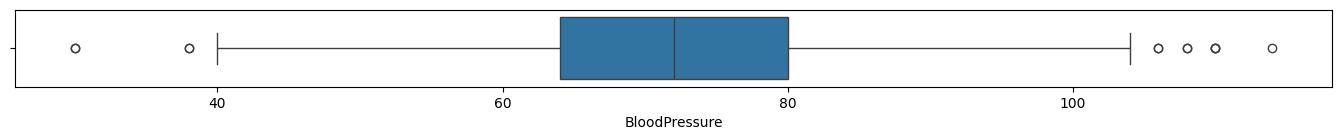

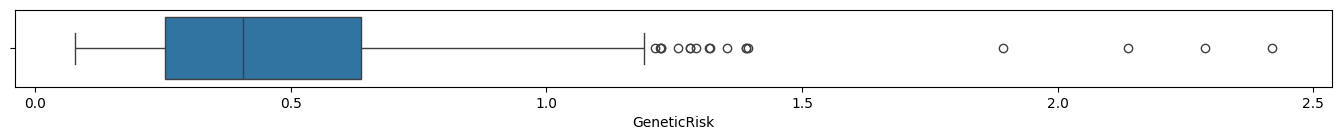

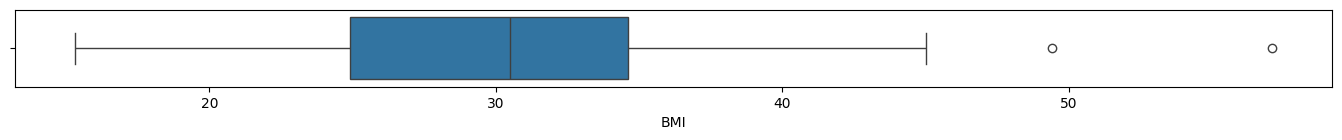

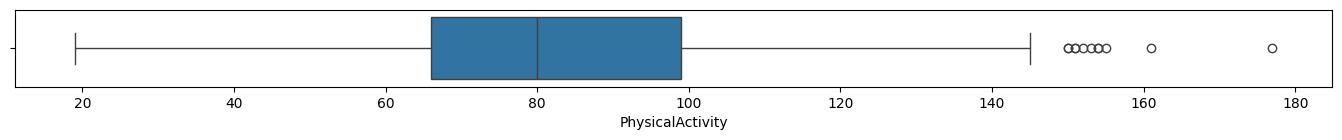

In [ ]:
# A neat trick for making plots for several columns

for col in ['Age', 'BloodPressure', 'GeneticRisk', 'BMI', 'PhysicalActivity']:
    #initialize a new canvas.
    #we'll also make them long and skinny so they stack well on top of each other
    plt.figure(figsize=(17,1))
    #plot the boxplot
    sns.boxplot(data=data_clean,x=col)

### Saving figures

The matplotlib figure object is also useful when you want to save figures.

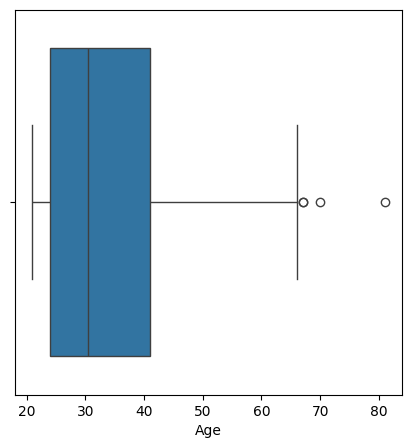

In [3]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data_clean,x='Age')
plt.savefig('box.png')

You can switch between different formats by changing the extension of the file name, i.e 'box.png', box.jpg' or box.pdf'.

If you are on colab the figure will appear in the 'Files' tab on the right (looks like a folder) and you need to download it to your computer if you want to have it forever.



### The `.show()` command

In colab as well as local jupyter notebooks, your plots will be directly shown to you below the code cell, as you have experienced so far.

However, you can also force a plot object to be portrayed with `plt.show()`.

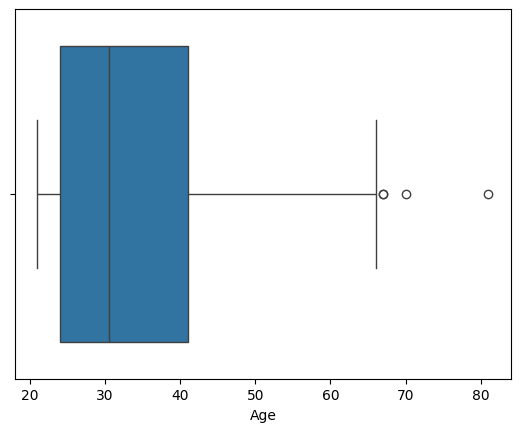

In [4]:
sns.boxplot(data=data_clean,x='Age')
plt.show()

Observe what happens if you put `.show()` before `.savefig()`. Hint: Download this png file to see the difference.

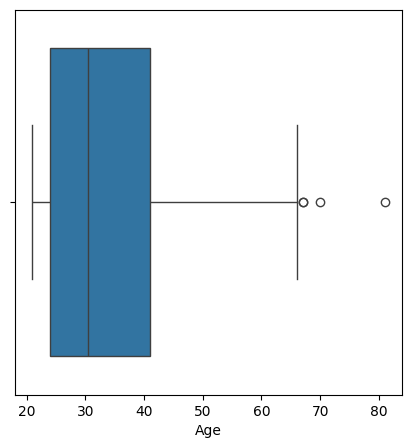

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data_clean,x='Age')
plt.show()
plt.savefig('another_box.png')